# Introduction
In this assignment, we analyse signals using the Fast Fourier transform, or the FFT for short. The FFT is a fast implementation of the Discrete Fourier transform(DFT). It runs in $\mathcal{O}(n \log n)$ time complexity. We find the FFTs of various types of signals using the numpy.fft module. We also attempt to approximate the continuous time fourier transform of a gaussian by windowing and sampling in time domain, and then taking the DFT. We iteratively increase window size and number of samples until we obtain an estimate of required accuracy.

In [1]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt

# Spectrum of $\sin^3(t)$

Using the following identity:
$$\sin^3(t) = \frac{3}{4}\sin(t) - \frac{1}{4}\sin(3t)$$

We expect two sets of peaks at frequencies of 1 and 3, with heights corresponding to half of $0.75$ and $0.25$.

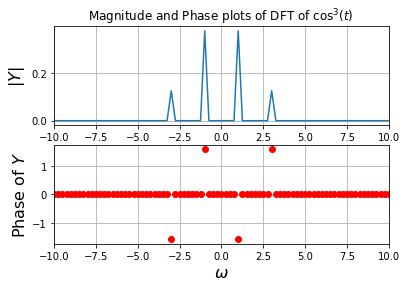

In [2]:
x = np.linspace(-4*pi,4*pi,513)[:-1]
w = np.linspace(-64,64,513)[:-1]
y1 = (np.sin(x))**3
Y1 = fftshift(fft(y1))/512
fig,ax = plt.subplots(2)
ax[0].plot(w,abs(Y1))
ax[0].set_xlim([-10,10])
ax[0].set_title(r"Magnitude and Phase plots of DFT of $\cos^3(t)$ ")
ax[0].set_ylabel(r"$|Y|$",size=16)
ax[0].set_xlabel(r"$\omega$",size=16)
ax[0].grid(True)
ii1 = np.where(abs(Y1)<10**-3)
ph = angle(Y1)
ph[ii1] = 0 
ax[1].plot(w,ph,"ro")
ax[1].set_xlim([-10,10])
ax[1].grid(True)
ax[1].set_ylabel(r"Phase of $Y$",size=16)
ax[1].set_xlabel(r"$\omega$",size=16)
plt.show()



We observe the peaks in the magnitude at the expected frequencies of 1 and 3, along with the expected amplitudes. The phases of the peaks are also in agreement with what is expected(one is a positive sine while the other is a negative sine).

# Spectrum of $\cos^3(t)$

Using the following identity:
$$\cos^3(t) = \frac{3}{4}\cos(t) + \frac{1}{4}\cos(3t)$$

We expect two sets of peaks at frequencies of 1 and 3, with heights corresponding to half of $0.75$ and $0.25$.

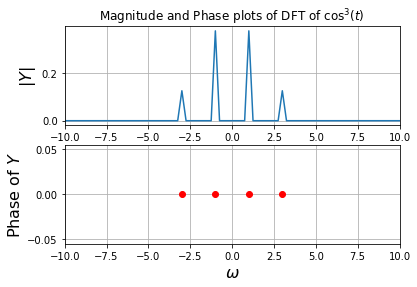

In [3]:
x = np.linspace(-4*pi,4*pi,129)[:-1]
w = np.linspace(-16,16,129)[:-1]
y2 = (np.cos(x))**3
Y2 = fftshift(fft(y2))/128
fig,bx = plt.subplots(2)
bx[0].plot(w,abs(Y2))
bx[0].set_xlim([-10,10])
bx[0].grid(True)
bx[0].set_ylabel(r"$|Y|$",size=16)
bx[0].set_xlabel(r"$\omega$",size=16)
bx[0].set_title(r"Magnitude and Phase plots of DFT of $\cos^3(t)$ ")
ii2 = np.where(abs(Y2)>10**-3)
bx[1].plot(w[ii2],angle(Y2[ii2]),"ro")
bx[1].set_xlim([-10,10])
bx[1].grid(True)
bx[1].set_ylabel(r"Phase of $Y$",size=16)
bx[1].set_xlabel(r"$\omega$",size=16)
plt.show()

We observe the peaks in the magnitude at the expected frequencies of 1 and 3, along with the expected amplitudes. The phases of the peaks are also in agreement with what is expected(both are positive cosines).

# Freq Modulation

We find the DFT of the following frequency modulated signal:

$$ \cos(20t +5 \cos(t))$$

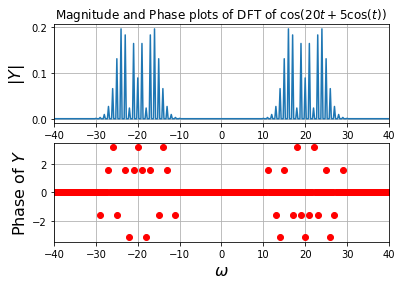

In [4]:
x = np.linspace(-4*pi,4*pi,513)[:-1]
w = np.linspace(-64,64,513)[:-1]
y1 = cos(20*x + 5*cos(x))
Y1 = fftshift(fft(y1))/512
fig,ax = plt.subplots(2)
ax[0].plot(w,abs(Y1))
ax[0].set_xlim([-40,40])
ax[0].grid(True)
ax[0].set_ylabel(r"$|Y|$",size=16)
ax[0].set_xlabel(r"$\omega$",size=16)
ax[0].set_title(r"Magnitude and Phase plots of DFT of $ \cos(20t +5 \cos(t))$ ")
ii1 = np.where(abs(Y1)<10**-3)
ph = angle(Y1)
ph[ii1] = 0 
ax[1].plot(w,ph,"ro")
ax[1].set_xlim([-40,40])
ax[1].grid(True)
ax[1].set_ylabel(r"Phase of $Y$",size=16)
ax[1].set_xlabel(r"$\omega$",size=16)
plt.show()

# Continuous time Fourier Transform of Gaussian

The fourier transform of a signal $x(t)$ is defined as follows:

$$X(\omega) = \frac{1}{2 \pi} \int_{- \infty}^{\infty} x(t) e^{-j \omega t} dt$$

We can approximate this by the fourier transform of the windowed version of the signal $x(t)$, with a sufficiently large window. Let the window be of size $T$. We get:

$$X(\omega) \approx \frac{1}{2 \pi} \int_{- \frac{T}{2}}^{\frac{T}{2}} x(t) e^{-j \omega t} dt$$

We can write the integral approximately as a Reimann sum:

$$X(\omega) \approx \frac{\Delta t}{2 \pi} \sum_{n = -\frac{N}{2}}^{\frac{N}{2}-1} x(n \Delta t) e^{-j \omega n \Delta t}$$

Where we divide the integration domain into $N$ parts (assume $N$ is even), each of width $\Delta t = \frac{T}{N}$.

Now, we sample our spectrum with a sampling period in the frequency domain of $\Delta \omega = \frac{2 \pi}{T}$, which makes our continuous time signal periodic with period equal to the window size $T$. Our transform then becomes:

$$X(k \Delta \omega) \approx \frac{\Delta t}{2 \pi} \sum_{n = -\frac{N}{2}}^{\frac{N}{2}-1} x(n \Delta t) e^{-j k n \Delta \omega \Delta t}$$

Which simplifies to:

$$X(k \Delta \omega) \approx \frac{\Delta t}{2 \pi} \sum_{n = -\frac{N}{2}}^{\frac{N}{2}-1} 
x(n \Delta t) e^{-j \frac{2 \pi}{N} k n}$$

Noticing that the summation is of the form of a DFT, we can finally write:

$$X(k \Delta \omega) \approx \frac{\Delta t}{2 \pi} DFT \{x(n \Delta t)\}$$

The two approximations we made were:

* The fourier transform of the windowed signal is approximately the same as that of the original.
* The integral was approximated as a Reimann sum.

We can improve these approximations by making the window size $T$ larger, and by decreasing the time domain sampling period or increasing the number of samples $N$. We implement this in an iterative algorithm in the next part.

The analytical expression of the fourier transform of the gaussian:

$$x(t) = e^{\frac{-t^2}{2}}$$

Was found as:

$$X(j \omega) = \frac{1}{\sqrt{2 \pi}}e^{\frac{-\omega^2}{2}}$$

We also compare the numerical results with the expected analytical expression.

In [5]:
def ideal(w):
    return (1/np.sqrt(2*pi)) * (exp((-1*w*w)/2))
def tol(N=128,tol=10**-6):
    T = 8*pi
    N = 128
    error = 10**10
    yold =0
    while error>tol:
        x = np.linspace(-T/2,T/2,N+1)[:-1]
        w = pi* np.linspace(-N/T,N/T,N+1)[:-1]
        Y1 = (T/(2*pi*N)) * fftshift(fft(ifftshift(exp(-x*x/2))))
        error = sum(abs(Y1-ideal(w)))
        yold = Y1
        T = T*2
        N = N*2
    print("max error =" + str(error))
    fig,ax = plt.subplots(2)
    ax[0].plot(w,abs(Y1))
    ax[0].set_xlim([-10,10])
    ax[0].grid(True)
    ax[0].set_ylabel(r"$|Y|$",size=16)
    ax[0].set_xlabel(r"$\omega$",size=16)
    ax[0].set_title(r"Magnitude and Phase plots(calculated) of DFT of $ \cos(20t +5 \cos(t))$ ")
    ii1 = np.where(abs(Y1)<10**-3)
    ph = angle(Y1)
    ph[ii1] =0
    ax[1].plot(w,ph,"r+")
    ax[1].set_xlim([-10,10])
    ax[1].grid(True)
    ax[1].set_ylabel(r"Phase of $Y$",size=16)
    ax[1].set_xlabel(r"$\omega$",size=16)
    plt.show()
    fig2,bx = plt.subplots(2)
    bx[0].plot(w,abs(ideal(w)))
    bx[0].set_xlim([-10,10])
    bx[0].grid(True)
    bx[0].set_ylabel(r"$|Y|$",size=16)
    bx[0].set_xlabel(r"$\omega$",size=16)
    bx[0].set_title(r"Magnitude and Phase plots(ideal) of DFT of $ \cos(20t +5 \cos(t))$ ")
    bx[1].plot(w,angle(ideal(w)),"r+")
    bx[1].set_xlim([-10,10])
    bx[1].grid(True)
    bx[1].set_ylabel(r"Phase of $Y$",size=16)
    bx[1].set_xlabel(r"$\omega$",size=16)
    plt.show()

    

max error =6.2104025667435085e-15


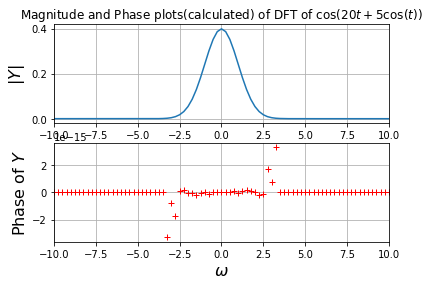

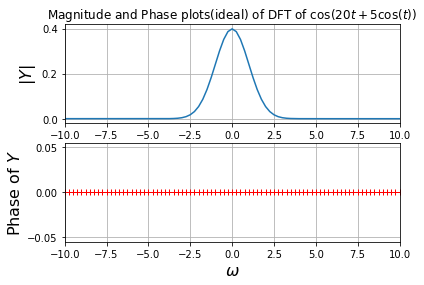

In [6]:
tol()

# Conclusions
* From the above pairs of plots, it is clear that with a sufficiently large window size and sampling rate, the DFT approximates the CTFT of the gaussian.
* This is because the magnitude of the gaussian quickly approaches $0$ for large values of time. This means that there is lesser frequency domain aliasing due to windowing. This can be interpreted as follows: 
* Windowing in time is equivalent to convolution with a sinc in frequency domain. A large enough window means that the sinc is tall and thin. This tall and thin sinc is approximately equivalent to a delta function for a sufficiently large window. This means that convolution with this sinc does not change the spectrum much.
* Sampling after windowing is done so that the DFT can be calculated using the Fast Fourier Transform. This is then a sampled version of the DTFT of the sampled time domain signal. With sufficiently large sampling rates, this approximates the CTFT of the original time domain signal.
* This process is done on the gaussian and the results are in agreement with what is expected.